In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('houseesss.csv')
data


,Area_in_Marla,baths,bedrooms,price,property_type,location,city,purpose
0,4.0,2,2,10000000,Flat,G-10,Islamabad,For Sale
1,5.6,3,3,6900000,Flat,E-11,Islamabad,For Sale
2,8.0,6,5,16500000,House,G-15,Islamabad,For Sale
3,40.0,4,4,43500000,House,Bani Gala,Islamabad,For Sale
4,8.0,3,3,7000000,House,DHA Defence,Islamabad,For Sale
...,...,...,...,...,...,...,...,...
99494,8.0,3,3,7500000,Flat,Bahria Town Karachi,Karachi,For Sale
99495,8.0,4,3,8800000,House,Bahria Town Karachi,Karachi,For Sale
99496,8.0,3,3,14000000,House,Bahria Town Karachi,Karachi,For Sale
99497,14.0,4,4,14000000,House,Bahria Town Karachi,Karachi,For Sale


In [4]:
data.isna().sum()

Area_in_Marla    0
price            0
baths            0
bedrooms         0
property_type    0
location         0
city             0
purpose          0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'Area_in_Marla'}>, <Axes: >]],
      dtype=object)

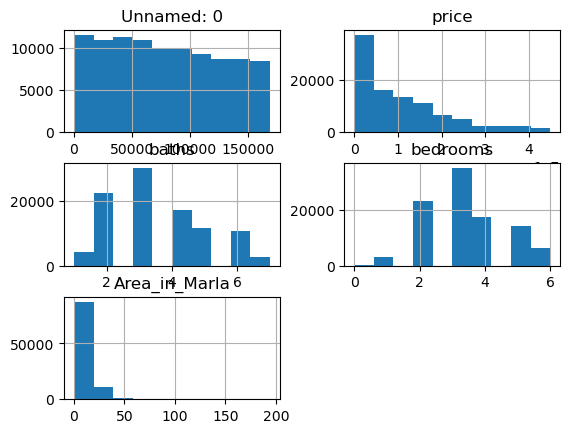

In [4]:
data.hist()

In [5]:
data.describe()

,Area_in_Marla,price,baths,bedrooms
count,99499.000000,9.949900e+04,99499.000000,99499.000000
mean,8.757479,1.037592e+07,3.530106,3.350737
std,7.466471,1.066000e+07,1.474217,1.255913
min,0.000000,1.550000e+04,1.000000,0.000000
25%,4.800000,1.500000e+05,2.000000,2.000000
50%,6.700000,7.500000e+06,3.000000,3.000000
75%,10.000000,1.550000e+07,5.000000,4.000000
max,194.000000,4.490000e+07,7.000000,6.000000


In [24]:
x=data.iloc[:,:1]
x

,Area_in_Marla
0,4.0
1,5.6
2,8.0
3,40.0
4,8.0
...,...
99494,8.0
99495,8.0
99496,8.0
99497,14.0


In [26]:
y=data.iloc[:,3:4]
y

,price
0,10000000
1,6900000
2,16500000
3,43500000
4,7000000
...,...
99494,7500000
99495,8800000
99496,14000000
99497,14000000


In [27]:
data.corr()

C:\Users\eluri\AppData\Local\Temp\ipykernel_10384\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Area_in_Marla,baths,bedrooms,price
Area_in_Marla,1.000000,0.373993,0.352021,0.145644
baths,0.373993,1.000000,0.863885,0.496222
bedrooms,0.352021,0.863885,1.000000,0.464393
price,0.145644,0.496222,0.464393,1.000000


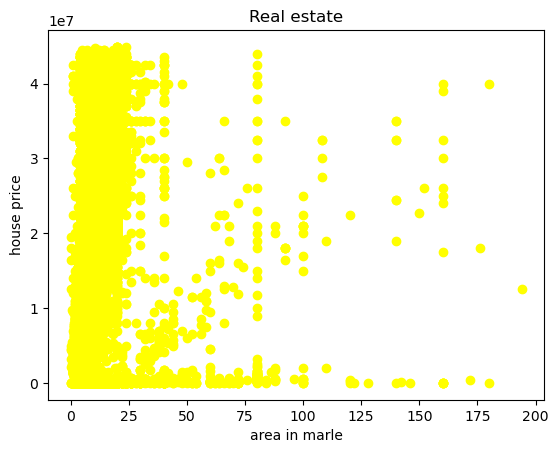

In [28]:
plt.scatter(x,y,color="yellow")
plt.title("Real estate")
plt.xlabel("area in marle")
plt.ylabel("house price")
plt.show()

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
data.shape

(99499, 8)

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[9574823.30039595]
 [9366792.17818064]
 [9990885.54482657]
 ...
 [9782854.42261126]
 [9574823.30039595]
 [9283579.72929452]]

 Testing is also completed....



In [32]:
ytest

,price
68766,11500000
14737,6500000
77269,25000
71886,12000000
50816,22000000
...,...
41092,3900000
85832,35000
23861,14000000
35351,4200000


In [33]:
diff=ytest-ypred
diff

,price
68766,1.925177e+06
14737,-2.866792e+06
77269,-9.965886e+06
71886,2.425177e+06
50816,1.138502e+07
...,...
41092,-5.258761e+06
85832,-9.539823e+06
23861,4.217146e+06
35351,-5.374823e+06


Text(0, 0.5, 'House Price')

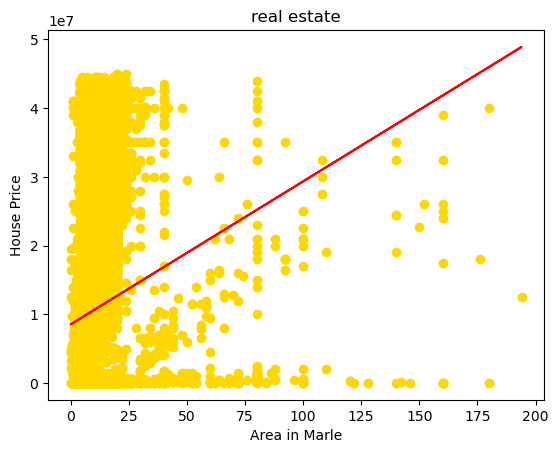

In [34]:
plt.scatter(xtrain,ytrain,color="gold")
plt.plot(xtrain,lin_reg.predict(xtrain),color="red")
plt.title("real estate")
plt.xlabel("Area in Marle")
plt.ylabel("House Price")

Text(0, 0.5, 'House Price')

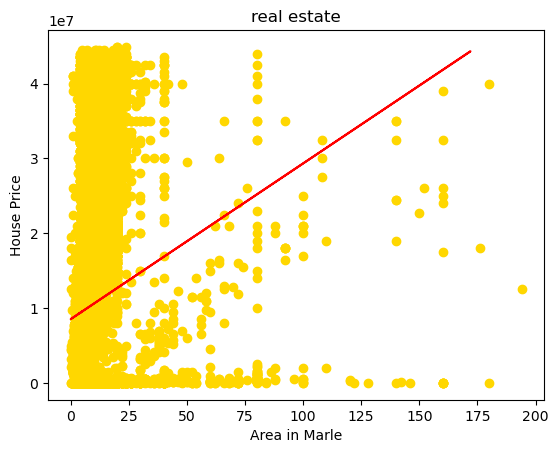

In [38]:
plt.scatter(xtrain,ytrain,color="gold")
plt.plot(xtest,lin_reg.predict(xtest),color="red")
plt.title("real estate")
plt.xlabel("Area in Marle")
plt.ylabel("House Price")

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 112068377062750.52

RMSE: 	 10586235.263905223

Variance Score:	 0.02098290019398441

R-Square: 	 0.020900498570837645


In [39]:
xm=data.iloc[:,:3]
xm

,Area_in_Marla,baths,bedrooms
0,4.0,2,2
1,5.6,3,3
2,8.0,6,5
3,40.0,4,4
4,8.0,3,3
...,...,...,...
99494,8.0,3,3
99495,8.0,4,3
99496,8.0,3,3
99497,14.0,4,4


In [40]:
ym=data.iloc[:,3:4]
ym

,price
0,10000000
1,6900000
2,16500000
3,43500000
4,7000000
...,...
99494,7500000
99495,8800000
99496,14000000
99497,14000000


In [50]:
import sklearn
from sklearn.model_selection import train_test_split
xmtrain,xmtest,ymtrain,ymtest=train_test_split(xm,ym,test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xmtrain,ymtrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ympred=lin_reg.predict(xmtest)
print("predicted Total Payment\n",ympred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[ 8710442.19200527]
 [ 4732374.22830127]
 [ 4516762.64042098]
 ...
 [16738448.64870669]
 [ 4660503.69900784]
 [ 4761122.44001864]]

 Testing is also completed....



In [52]:
diff=ytest-ympred
diff

,price
68766,2.789558e+06
14737,1.767626e+06
77269,-4.491763e+06
71886,-2.372654e+06
50816,5.549033e+06
...,...
41092,-9.004122e+06
85832,-1.150655e+07
23861,-2.738449e+06
35351,-4.605037e+05


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ymtest, ympred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ymtest, ympred)))
print()
print('Variance Score:\t', explained_variance_score (ymtest,ympred))


print()
print('R-Square: \t', r2_score (ymtest, ympred))

Mean Squared Error: 	 85631489747996.83

RMSE: 	 9253728.424154062

Variance Score:	 0.2518811886117124

R-Square: 	 0.2518696967302868
